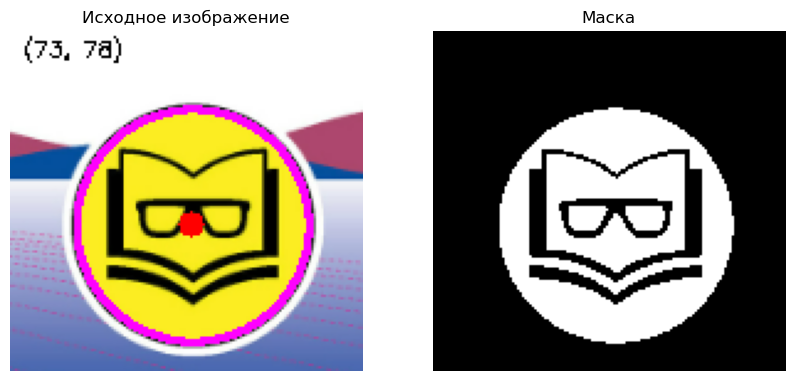

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Считываеам кадр
frame = cv2.imread('yellow_image.jpg')

#Преобразование в HSV
frame_HSV = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

#Пороги желтого цвета
low_yellow = np.array([20,110,110])
high_yellow = np.array([40,255,255])

#Маска
yel_mask = cv2.inRange(frame_HSV,low_yellow,high_yellow)

#Нахождение контуров
contours, hierarchy = cv2.findContours(yel_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Нахождение центра
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(frame, (cX, cY), 5, (0, 0, 255), -1)  
    #Рисование контуров
    cv2.drawContours(frame, contours, -1, (255, 0, 255), 2)
    cv2.putText(frame, f'({cX}, {cY})', (5, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), 1)

#Вывод кадра
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Исходное изображение')
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
plt.axis('off')
           
plt.subplot(1,2,2)
plt.title('Маска')
plt.imshow(cv2.cvtColor(yel_mask,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()